#**THỰC HÀNH: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU**

##**1.3. Phân tích đơn biến và hai biến**

###1. Phân tích đơn biến là gì? Khác gì với phân tích hai biến?

Phân tích đơn biến (univariate analysis): xem xét một biến duy nhất để hiểu phân phối, xu hướng trung tâm, độ phân tán, hình dạng, ngoại lệ. Ví dụ: điểm thi của một lớp, giá nhà của một quận.

* Mục tiêu: mô tả biến đó, phát hiện lệch, nhiễu, outlier, chọn phép biến đổi phù hợp.
* Đồ thị thường dùng: histogram, KDE, boxplot, ECDF, bar chart cho biến phân loại.

Phân tích hai biến (bivariate analysis): xem xét mối quan hệ giữa hai biến.

* Cặp số-số: kiểm tra dạng quan hệ, độ mạnh, chiều hướng.
* Cặp số-phân loại: so sánh phân phối của biến số giữa các nhóm.
* Cặp phân loại-phân loại: mức độ liên hệ giữa các hạng mục.
* Đồ thị thường dùng: scatter plot, line plot theo thời gian, boxplot/violin cho số-phân loại, heatmap ma trận tương quan, mosaic plot cho phân loại-phân loại.

###2. Các thước đo thống kê thường dùng trong phân tích đơn biến

Xu hướng trung tâm:

* Trung bình
* Trung vị (median) - bền vững trước outlier
* Mode - giá trị xuất hiện nhiều nhất

Độ phân tán:
* Phạm vi (range), IQR = Q3 - Q1
* Phương sai: $\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$
* Độ lệch chuẩn: $\sigma = \sqrt{\sigma^2}$
* Độ lệch (Skewness): $\text{Skew}(X) = \frac{E[(X-\mu)^3]}{\sigma^3}$
* MAD - Median Absolute Deviation, bền vững trước outlier

Hình dạng phân phối:
- Skewness - độ lệch
- Kurtosis - độ nhọn/độ dẹt
- Độ nhọn (Kurtosis): $\text{Kurt}(X) = \frac{E[(X-\mu)^4]}{\sigma^4} - 3$

Phát hiện ngoại lệ:
- Quy tắc IQR: điểm < Q1 - 1.5×IQR hoặc > Q3 + 1.5×IQR
- Z-score: ∣z∣>3 thường coi là ngoại lệ


###3. Trong phân tích hai biến, xác định mối quan hệ như thế nào?

Tùy loại biến:
 Số - số:
- Tương quan:  Pearson cho quan hệ tuyến tính, Spearman cho quan hệ đơn điệu, Kendall cho hạng.
- Mô hình: hồi quy tuyến tính, hồi quy phi tuyến, spline.
- Đồ thị: scatter, scatter với đường hồi quy, residual plot, hexbin nếu dữ liệu rất dày.

Số - phân loại:
- So sánh trung bình hoặc phân phối giữa nhóm: t-test 2 nhóm, ANOVA nhiều nhóm, hoặc Kruskal-Wallis nếu không phân phối chuẩn.
- Đồ thị: boxplot, violin, swarm/strip.

Phân loại - phân loại:
- Bảng chéo, kiểm định chi bình phương, Cramér’s V.

Nhân quả khác tương quan:
- Tương quan chỉ cho thấy biến cùng biến thiên, không khẳng định A gây ra B.
- Để biện minh nhân quả, cần thiết kế và bằng chứng: thí nghiệm ngẫu nhiên, tự nhiên, chuỗi thời gian can thiệp, IV, RDD, DiD, kiểm soát nhiễu, DAGs. Cần lưu ý đảo chiều nhân quả và nghịch lý Simpson.

###4. Khác biệt giữa tương quan và hiệp biến
Hiệp biến: $\mathrm{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$
- Đơn vị phụ thuộc vào thang đo của X và Y.
- Dấu dương: cùng chiều, âm: ngược chiều. Độ lớn khó so sánh giữa cặp biến khác thang.

Tương quan Pearson: $r = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}$, $-1 \le r \le 1$
- Chuẩn hóa về khoảng [−1,1], không phụ thuộc đơn vị đo, dễ so sánh.
- ∣r∣ càng gần 1 thì quan hệ tuyến tính càng mạnh. r≈0 không nhất thiết là “không quan hệ” - có thể quan hệ phi tuyến.

###5. Khi nào dùng biểu đồ đơn biến và khi nào dùng biểu đồ hai biến?
Đơn biến:
- Thăm dò nhanh phân phối, phát hiện lệch và outlier trước khi làm mô hình.
- So sánh trước - sau tiền xử lý.

Hai biến:
- Khi muốn thấy cấu trúc quan hệ, tuyến tính hay không, tương tác giữa biến giải thích và biến mục tiêu.
- Khi kiểm định giả thuyết về khác biệt giữa nhóm, hay độ mạnh mối liên hệ.

Với dữ liệu lớn: dùng hexbin hoặc KDE thay vì scatter dày đặc. Với phân loại nhiều mức: cân nhắc violin hoặc boxen để thể hiện đuôi phân phối.

###6. Code mẫu: scatter plot và heatmap để phân tích quan hệ hai biến
####6.1 Scatter plot đơn giản với đường hồi quy và hệ số r

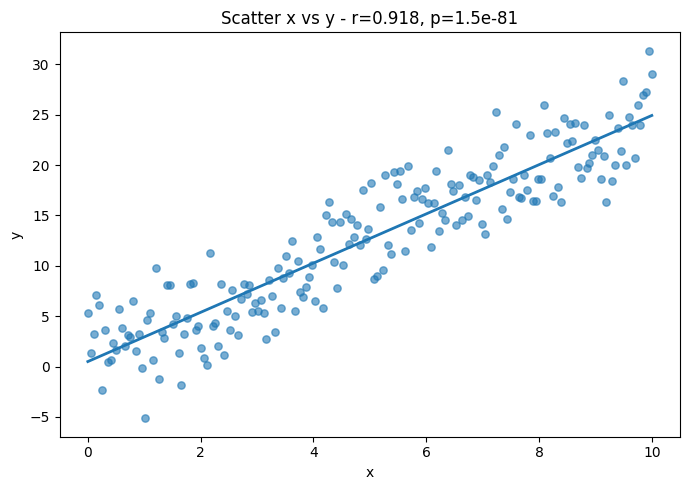

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # nếu chưa có SciPy, có thể dùng df.corr()

# Ví dụ dữ liệu
np.random.seed(0)
n = 200
x = np.linspace(0, 10, n)
y = 2.5*x + np.random.normal(0, 3, n)
df = pd.DataFrame({'x': x, 'y': y})

# Tính r
r, p = pearsonr(df['x'], df['y'])  # hoặc df[['x','y']].corr().loc['x','y']

# Vẽ scatter và đường hồi quy
plt.figure(figsize=(7,5))
plt.scatter(df['x'], df['y'], alpha=0.6, s=28)
coef = np.polyfit(df['x'], df['y'], 1)
xline = np.linspace(df['x'].min(), df['x'].max(), 100)
yline = np.polyval(coef, xline)
plt.plot(xline, yline, linewidth=2)

plt.title(f"Scatter x vs y - r={r:.3f}, p={p:.2g}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

####6.2 Heatmap ma trận tương quan các biến số

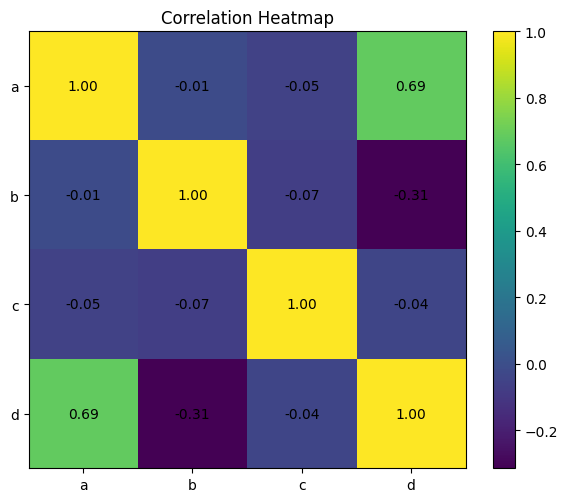

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử df có nhiều cột số
np.random.seed(1)
df = pd.DataFrame({
    'a': np.random.normal(size=300),
    'b': np.random.normal(size=300),
    'c': np.random.normal(size=300)
})
df['d'] = 0.5*df['a'] - 0.2*df['b'] + np.random.normal(scale=0.5, size=300)

corr = df.corr(numeric_only=True)

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

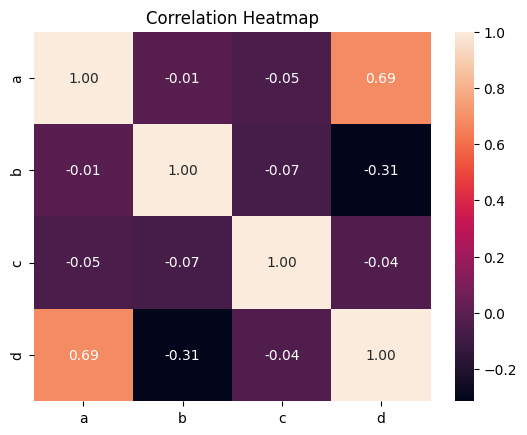

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###7. Trực quan hóa số - phân loại bằng boxplot hoặc violin
####7.1 Với seaborn cho gọn

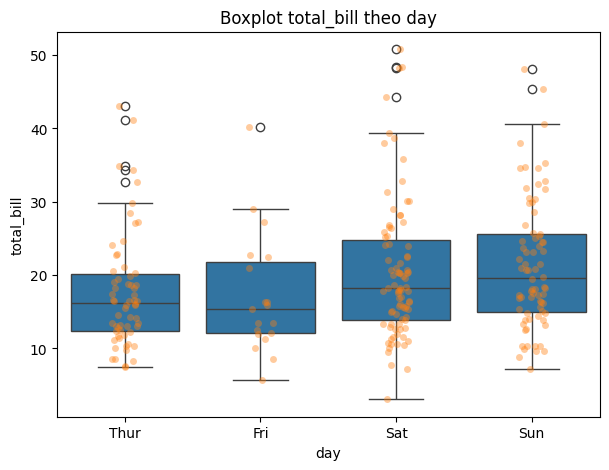

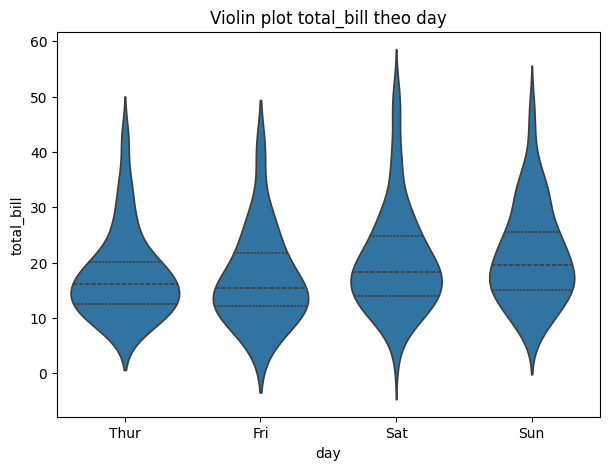

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ: bộ dữ liệu tips
tips = sns.load_dataset("tips")  # cột 'total_bill' là số, 'day' là phân loại

plt.figure(figsize=(7,5))
sns.boxplot(data=tips, x="day", y="total_bill")
sns.stripplot(data=tips, x="day", y="total_bill", alpha=0.4)  # điểm rải để thấy mật độ
plt.title("Boxplot total_bill theo day")
plt.show()

plt.figure(figsize=(7,5))
sns.violinplot(data=tips, x="day", y="total_bill", inner="quartile")
plt.title("Violin plot total_bill theo day")
plt.show()

####7.2 Thuần matplotlib

/tmp/ipython-input-3799551592.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_group, labels=groups, showfliers=True)


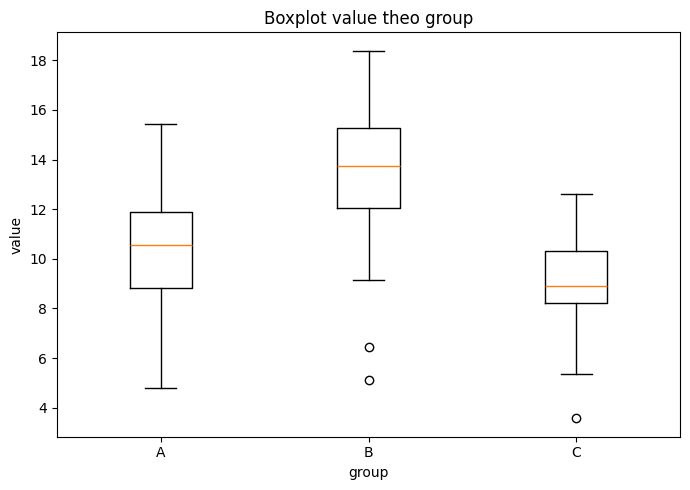

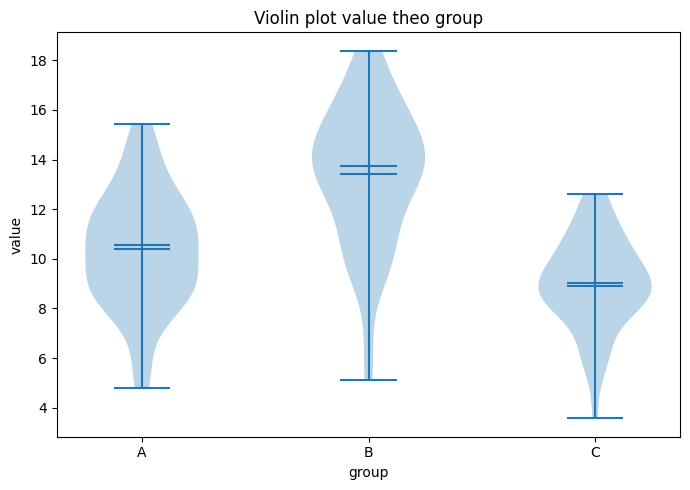

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df có cột số 'value' và cột phân loại 'group'
df = pd.DataFrame({
    'group': ['A']*50 + ['B']*50 + ['C']*50,
    'value': pd.concat([
        pd.Series(np.random.normal(10, 2, 50)),
        pd.Series(np.random.normal(13, 2.5, 50)),
        pd.Series(np.random.normal(9, 1.8, 50)),
    ], ignore_index=True)
})

groups = df['group'].unique()
data_by_group = [df.loc[df['group']==g, 'value'].values for g in groups]

# Boxplot
plt.figure(figsize=(7,5))
plt.boxplot(data_by_group, labels=groups, showfliers=True)
plt.title("Boxplot value theo group")
plt.xlabel("group")
plt.ylabel("value")
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(7,5))
plt.violinplot(data_by_group, showmeans=True, showmedians=True)
plt.xticks(ticks=range(1, len(groups)+1), labels=groups)
plt.title("Violin plot value theo group")
plt.xlabel("group")
plt.ylabel("value")
plt.tight_layout()
plt.show()

### 1.3.2. Bài làm mẫu
####Bài toán 1:


1. Import thư viện và nạp dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins_data = pd.read_csv("/content/drive/MyDrive/Data_Analysis/Tuần 5/penguins_size.csv")
penguins_data = penguins_data[['species', 'culmen_length_mm']]


2. Phân tích đơn biến bằng Histogram

Text(0.5, 1.0, 'Univariate analysis of Culmen Length')

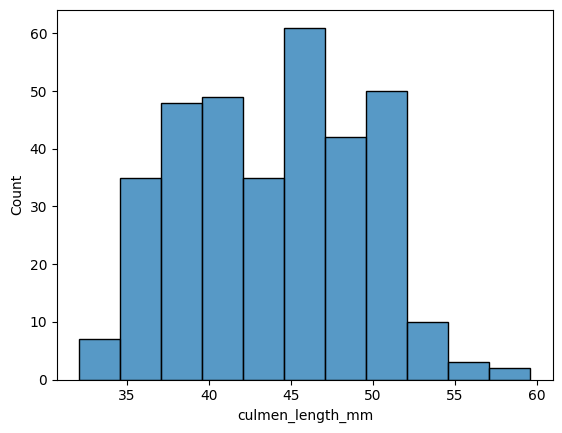

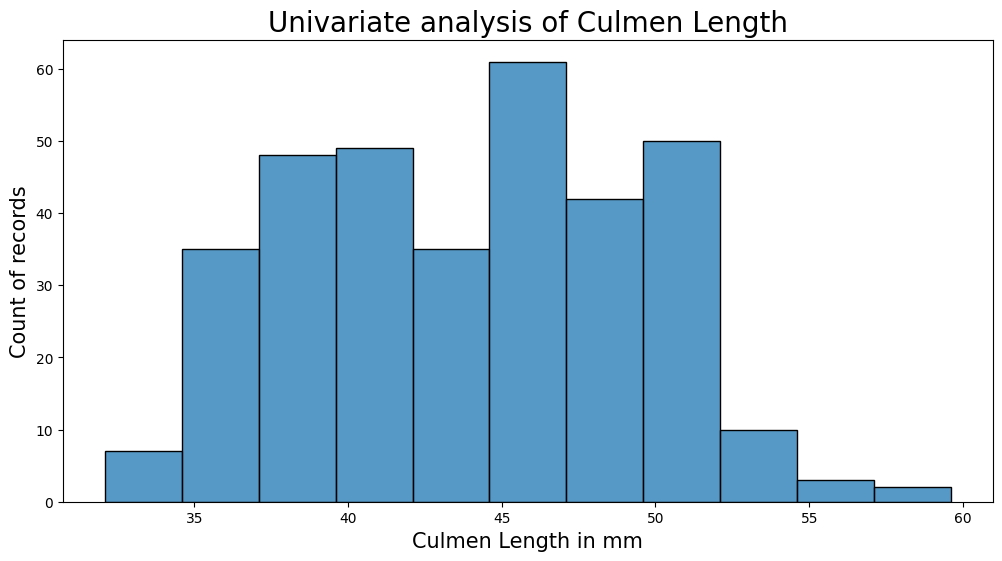

In [ ]:
# case 1: basic
sns.histplot( data = penguins_data, x= penguins_data["culmen_length_mm"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.histplot( data = penguins_data, x= penguins_data["culmen_length_mm"])
ax.set_xlabel('Culmen Length in mm',fontsize = 15)
ax.set_ylabel('Count of records', fontsize = 15)
ax.set_title('Univariate analysis of Culmen Length',fontsize= 20)

3. Phân tích đơn biến bằng bar chart

Text(0.5, 1.0, 'Univariate analysis of Culmen Length')

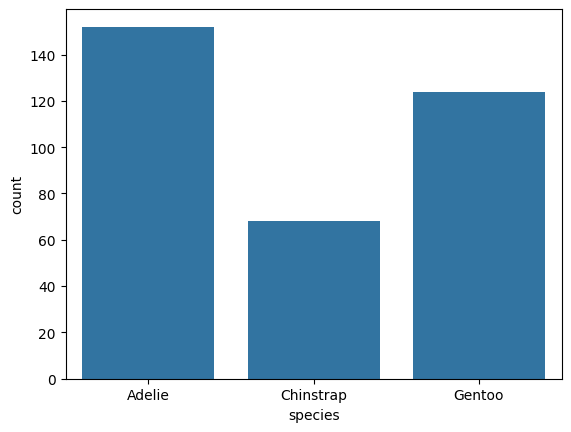

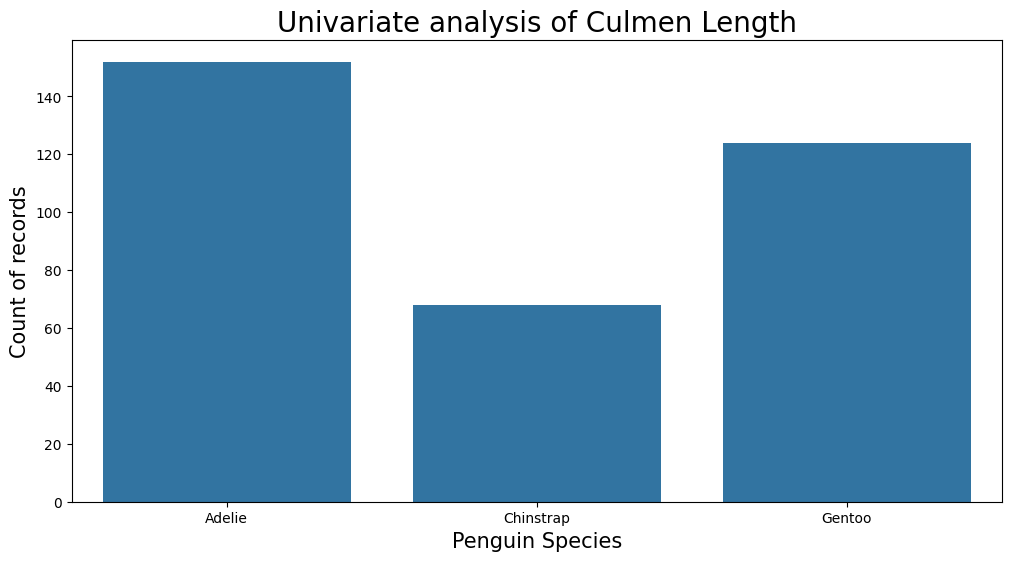

In [ ]:
# case 1: basic
sns.countplot(data = penguins_data, x= penguins_data['species'])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.countplot(data = penguins_data, x= penguins_data['species'])
ax.set_xlabel('Penguin Species',fontsize = 15)
ax.set_ylabel('Count of records',fontsize = 15)
ax.set_title('Univariate analysis of Penguin Species', fontsize= 20)
ax.set_title('Univariate analysis of Culmen Length', fontsize= 20)

4. Phân tích đơn biến bằng biểu đồ tròn (Pie-chart)

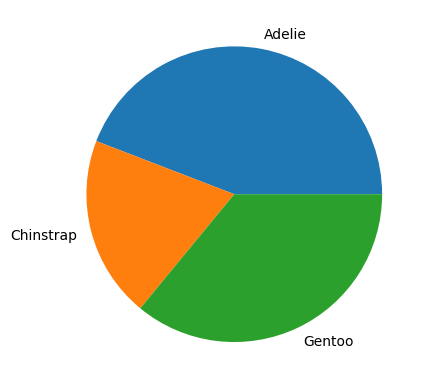

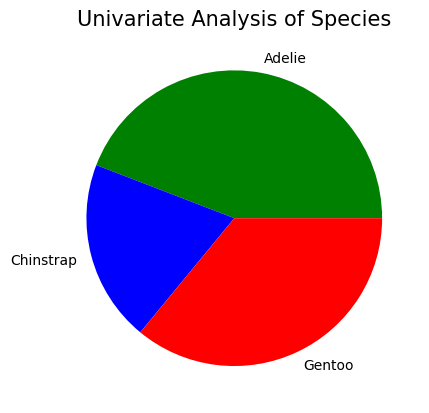

In [ ]:
penguins_group = penguins_data.groupby('species').count()
penguins_group = penguins_group.reset_index()
# case 1: basic
plt.pie(penguins_group["culmen_length_mm"], labels =
penguins_group['species'])
plt.show()
# case 2: advanced
cols = ['g', 'b', 'r']
plt.pie(penguins_group["culmen_length_mm"], labels =
penguins_group['species'],colors = cols)
plt.title('Univariate Analysis of Species', fontsize=15)
plt.show()

####**Nhiệm vụ 2: Phân tích dữ liệu đơn biến trên dữ liệu giá nhà lấy từ**

1. Import thư viện, nạp dữ liệu giá nhà và phân tích đơn biến dựa vào boxplot

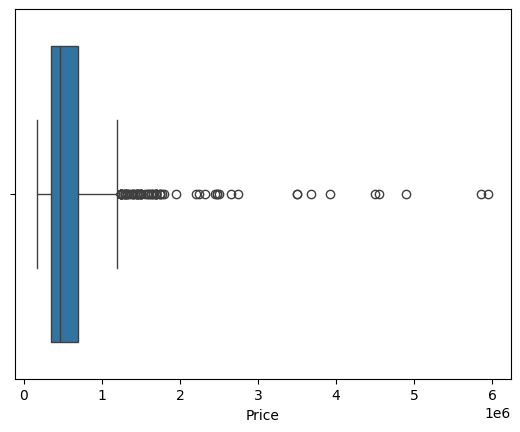

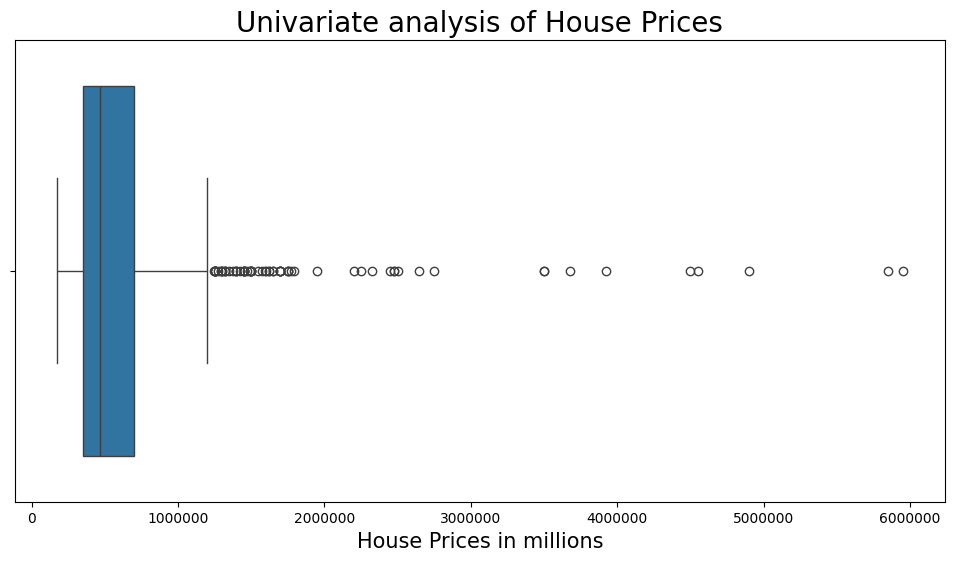

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
houseprices_data = pd.read_csv("/content/drive/MyDrive/Data_Analysis/Tuần 5/HousingPrices-Amsterdam-August-2021.csv")
houseprices_data = houseprices_data[['Zip','Price','Area','Room']]
# case 1: Create a boxplot using the boxplot method
sns.boxplot(data = houseprices_data, x= houseprices_data["Price"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.boxplot(data = houseprices_data, x= houseprices_data["Price"])
ax.set_xlabel('House Prices in millions',fontsize = 15)
ax.set_title('Univariate analysis of House Prices', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

2. Phân tích dữ liệu đơn biến dựa vào violin plot

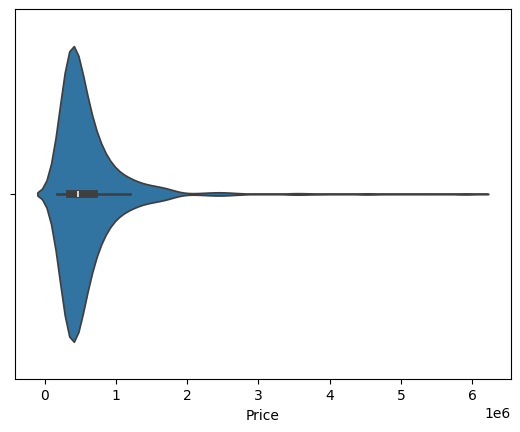

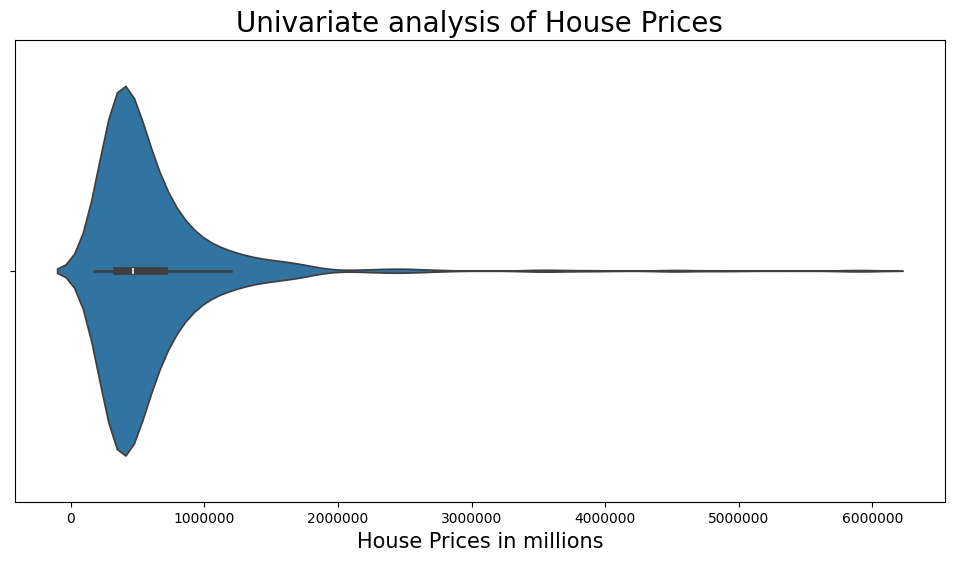

In [ ]:
# case 1: basic
sns.violinplot(data = houseprices_data, x= houseprices_data["Price"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.violinplot(data = houseprices_data, x=houseprices_data["Price"])
ax.set_xlabel('House Prices in millions',fontsize = 15)
ax.set_title('Univariate analysis of House Prices', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

3. Phân tích dữ liệu đơn biến dựa vào bản tóm tắt dữ liệu

In [ ]:
houseprices_data.describe()

,Price,Area,Room
count,9.200000e+02,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429
std,5.389942e+05,57.447436,1.592332
min,1.750000e+05,21.000000,1.000000
25%,3.500000e+05,60.750000,3.000000
50%,4.670000e+05,83.000000,3.000000
75%,7.000000e+05,113.000000,4.000000
max,5.950000e+06,623.000000,14.000000


4. Tạo chỉ số & xử lý ngoại lai (IQR)

In [ ]:
import numpy as np
import pandas as pd

df = houseprices_data.copy()

# Chỉ số quan trọng
df["Price_per_m2"] = df["Price"] / df["Area"].replace(0, np.nan)

# Hàm loại ngoại lai theo IQR cho các cột số
def remove_outliers_iqr(data, cols, k=1.5):
    out = data.copy()
    mask = pd.Series([True]*len(out), index=out.index)
    for c in cols:
        if c not in out:
            continue
        q1, q3 = out[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        low, high = q1 - k*iqr, q3 + k*iqr
        mask &= out[c].between(low, high) | out[c].isna()
    return out[mask]

df_clean = remove_outliers_iqr(df, ["Price", "Area", "Price_per_m2"])
df.shape, df_clean.shape


((924, 5), (839, 5))

5. Phân tích hai biến: tương quan & scatter có đường hồi quy

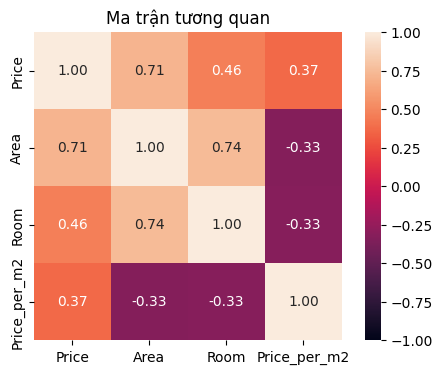

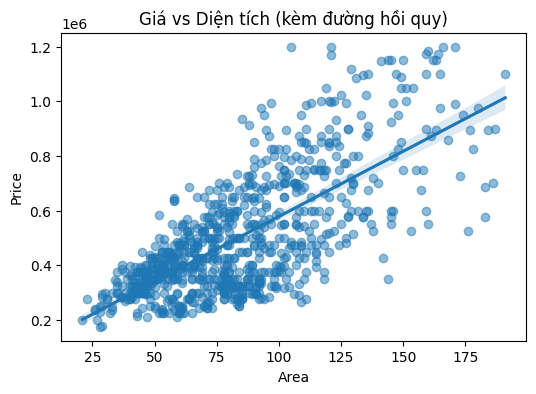

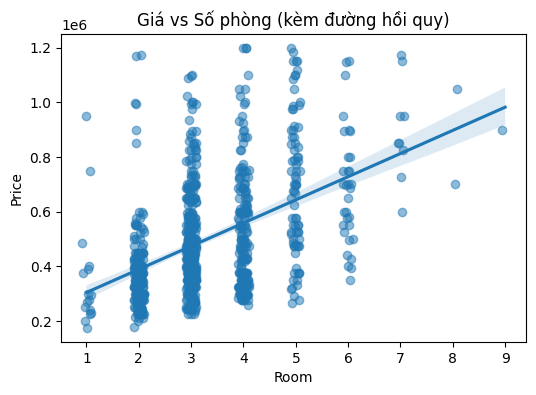

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Price", "Area", "Room", "Price_per_m2"]
corr = df_clean[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True)
plt.title("Ma trận tương quan")
plt.show()

# Scatter Area ~ Price
plt.figure(figsize=(6,4))
sns.regplot(data=df_clean, x="Area", y="Price", scatter_kws={"alpha":0.5})
plt.title("Giá vs Diện tích (kèm đường hồi quy)")
plt.show()

# Scatter Room ~ Price
plt.figure(figsize=(6,4))
sns.regplot(data=df_clean, x="Room", y="Price", x_jitter=.1, scatter_kws={"alpha":0.5})
plt.title("Giá vs Số phòng (kèm đường hồi quy)")
plt.show()


6. So sánh theo khu vực (Zip): top theo median

In [ ]:
# Bảng thống kê theo Zip
zip_stats = (
    df_clean.groupby("Zip")
    .agg(Count=("Price","size"),
         Price_median=("Price","median"),
         Price_mean=("Price","mean"),
         Area_median=("Area","median"),
         Ppm2_median=("Price_per_m2","median"))
    .sort_values("Price_median", ascending=False)
)

zip_stats.head(10)


,Count,Price_median,Price_mean,Area_median,Ppm2_median
Zip,,,,,
1054 HR,1,1200000.0,1200000.0,166.0,7228.915663
1015 MZ,1,1200000.0,1200000.0,105.0,11428.571429
1058 GA,1,1200000.0,1200000.0,171.0,7017.543860
1017 HH,1,1185000.0,1185000.0,160.0,7406.250000
1077 MR,1,1175000.0,1175000.0,159.0,7389.937107
1018 AW,1,1175000.0,1175000.0,164.0,7164.634146
1016 GX,1,1170000.0,1170000.0,121.0,9669.421488
1058 BD,1,1150000.0,1150000.0,150.0,7666.666667
1097 BA,1,1150000.0,1150000.0,163.0,7055.214724


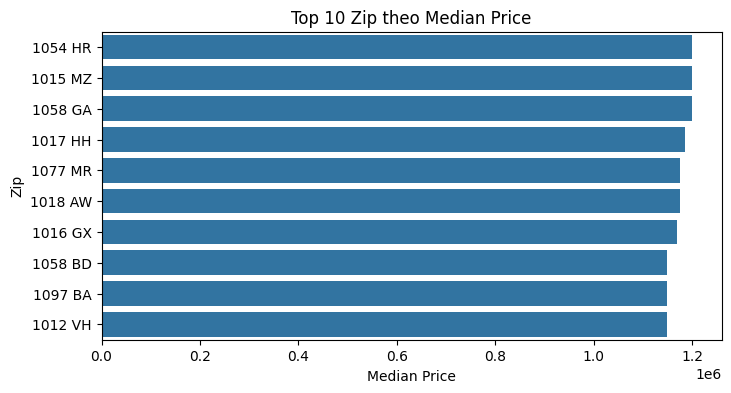

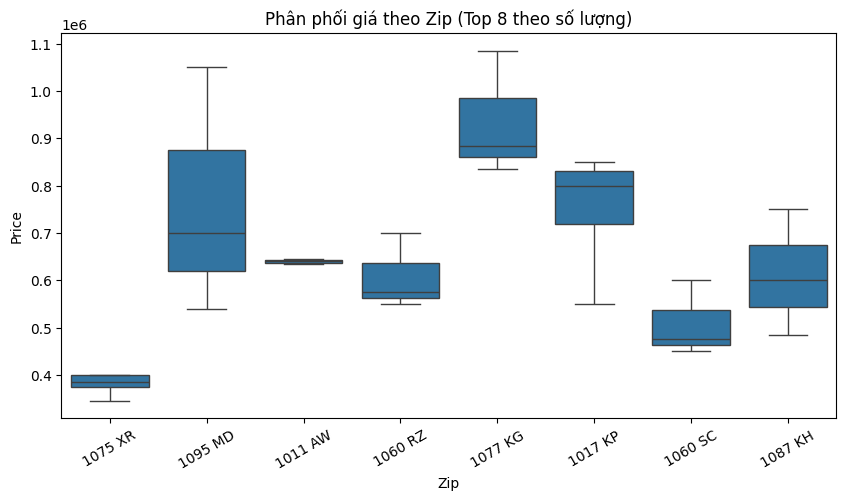

In [ ]:
# Bar chart: Top 10 Zip có median Price cao nhất
top10 = zip_stats.head(10).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=top10, y="Zip", x="Price_median")
plt.title("Top 10 Zip theo Median Price")
plt.xlabel("Median Price")
plt.ylabel("Zip")
plt.show()

# Boxplot giá theo Zip (top 8 theo số lượng)
top_zip_by_count = (df_clean["Zip"].value_counts().head(8).index)
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean[df_clean["Zip"].isin(top_zip_by_count)],
            x="Zip", y="Price", showfliers=False)
plt.title("Phân phối giá theo Zip (Top 8 theo số lượng)")
plt.xticks(rotation=30)
plt.show()


8) Báo cáo nhanh insight & export


In [ ]:
# Insight text cơ bản
insights = []

# 1. Tương quan
c = df_clean[["Price","Area","Room","Price_per_m2"]].corr().loc["Price", ["Area","Room","Price_per_m2"]]
insights.append(f"- Corr(Price, Area) = {c['Area']:.2f}; Corr(Price, Room) = {c['Room']:.2f}.")

# 2. Thống kê chính
insights.append(f"- Median Price: {df_clean['Price'].median():,.0f}  |  Mean Price: {df_clean['Price'].mean():,.0f}")
insights.append(f"- Median Area:  {df_clean['Area'].median():.1f} m²  |  Median Price/m²: {df_clean['Price_per_m2'].median():,.0f}")

# 3. Top Zip
topline = zip_stats.head(5).reset_index()[["Zip","Price_median","Ppm2_median"]]
insights.append("- Top 5 Zip theo median price:\n" + topline.to_string(index=False))

print("BÁO CÁO NHANH:")
print("\n".join(insights))

# Export các bảng
zip_stats.to_csv("zip_stats.csv", index=True)
df_clean.to_csv("houseprices_clean.csv", index=False)
print("Đã lưu: zip_stats.csv, houseprices_clean.csv")


BÁO CÁO NHANH:
- Corr(Price, Area) = 0.71; Corr(Price, Room) = 0.46.
- Median Price: 439,000  |  Mean Price: 501,373
- Median Area:  80.0 m²  |  Median Price/m²: 6,389
- Top 5 Zip theo median price:
    Zip  Price_median  Ppm2_median
1054 HR     1200000.0  7228.915663
1015 MZ     1200000.0 11428.571429
1058 GA     1200000.0  7017.543860
1017 HH     1185000.0  7406.250000
1077 MR     1175000.0  7389.937107
Đã lưu: zip_stats.csv, houseprices_clean.csv


###**1.3.3. Bài tập thực hành 1**

##**SweetViz**
*Giới thiệu về SweetViz :*
- SweetViz là thư viện mã nguồn mở trong Python giúp tự động tạo báo cáo tương tác cho EDA, xuất ra file HTML có thể mở trong trình duyệt
- Mục tiêu chính: giúp nhà phân tích dữ liệu nhanh chóng khám phá dữ liệu (thống kê mô tả, phân phối, mối quan hệ) mà không phải viết nhiều mã trực quan hoá thủ công.
- Trong các phiên bản gần đây, SweetViz hỗ trợ thêm tích hợp với Comet.ml để tự động đăng báo cáo lên workspace nếu thiết lập API key.

*các tính năng nổi bật*
- Phân tích tổng quan / thống kê
- Phân loại kiểu dữ liệu & phát hiện tự động
- Phân tích mối quan hệ / tương quan hỗn hợp
- Phân tích mục tiêu (Target Analysis)
- So sánh giữa hai dataset
- Tương tác trong Jupyter / Notebook
- Tuỳ chỉnh giao diện báo cáo
- Verbosity & Debug / Log

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.7 MB/s eta 0:00:00
Kích thước dữ liệu: (2240, 1)


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/DataAnalysis/Tuần 5/marketing_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



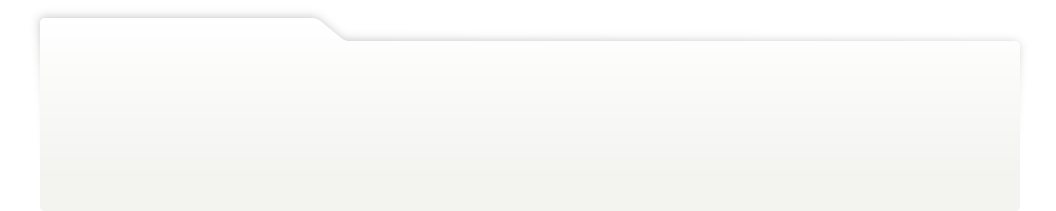
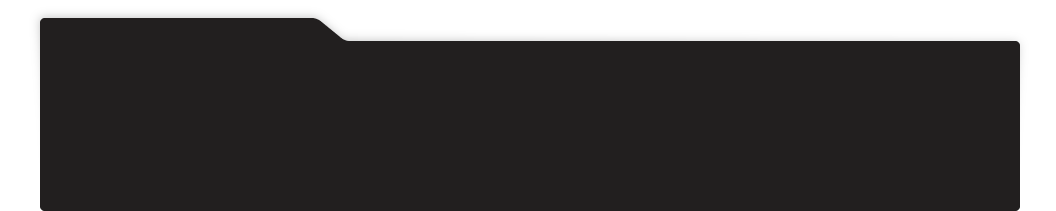
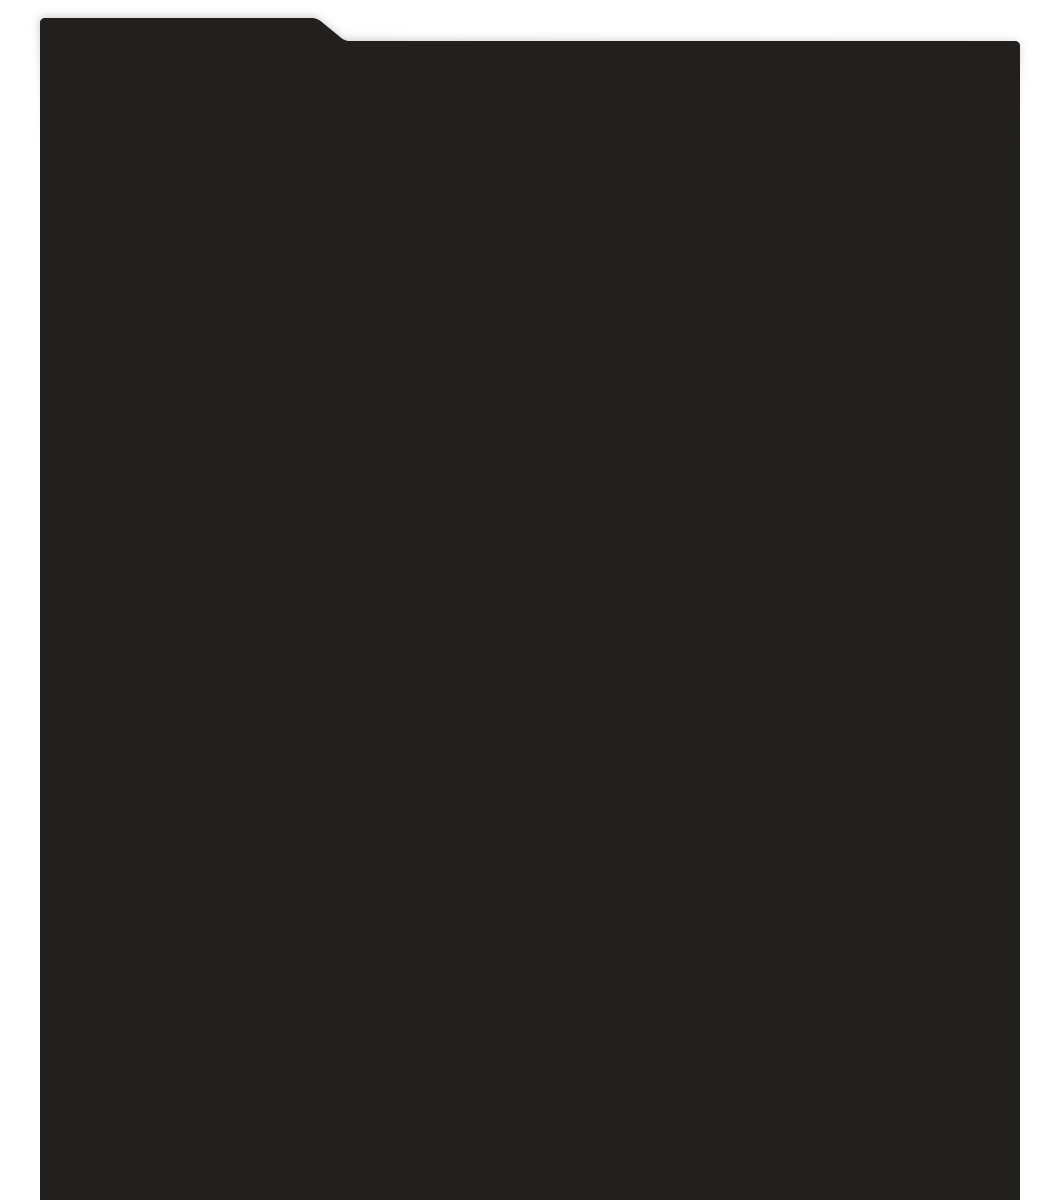
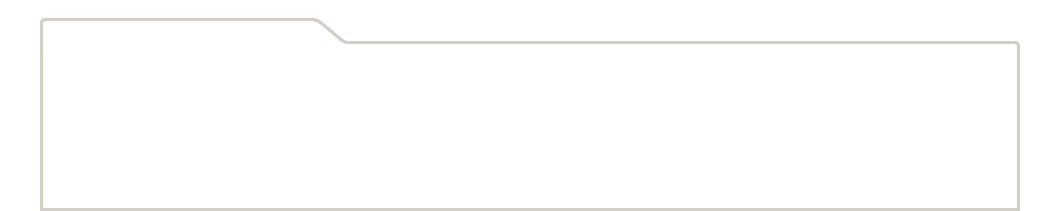
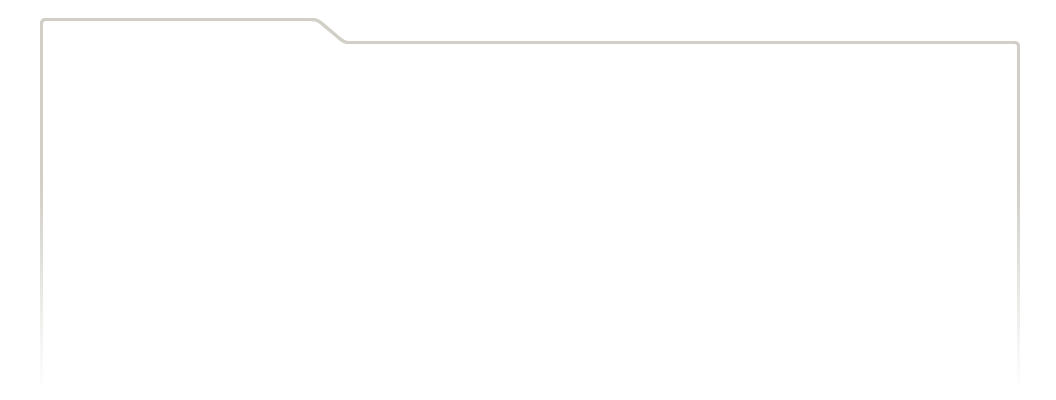
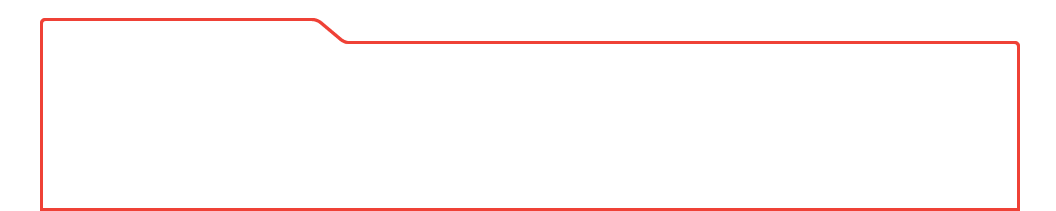
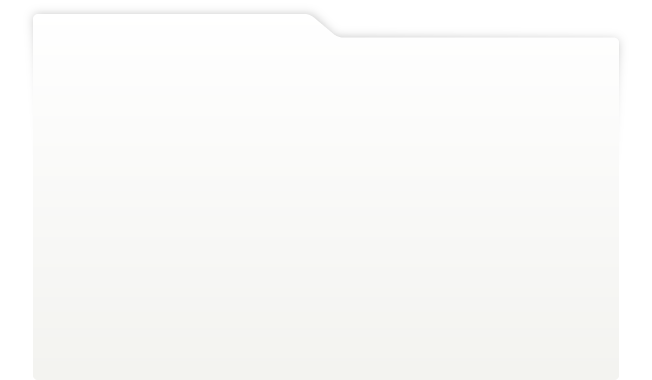
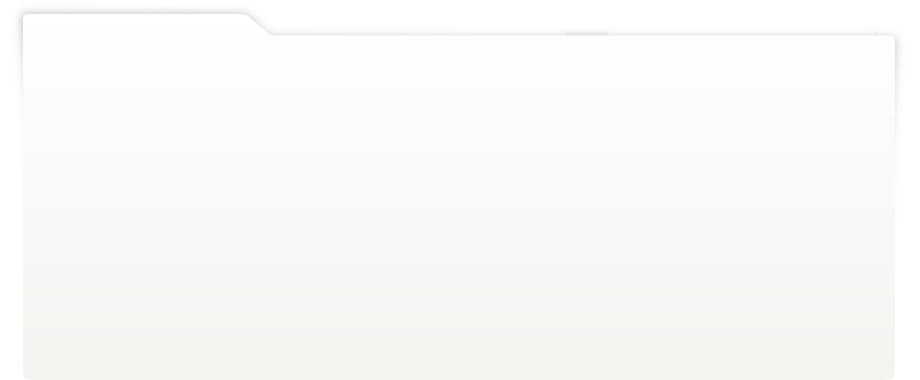
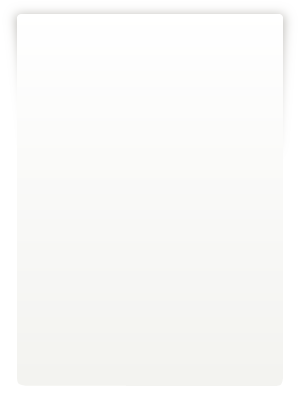
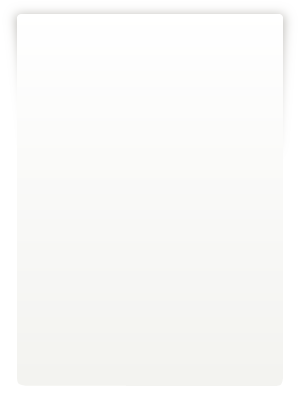
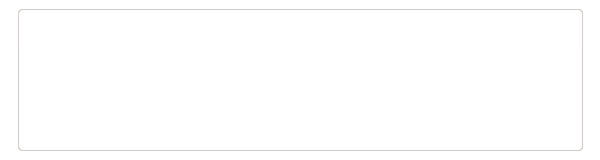
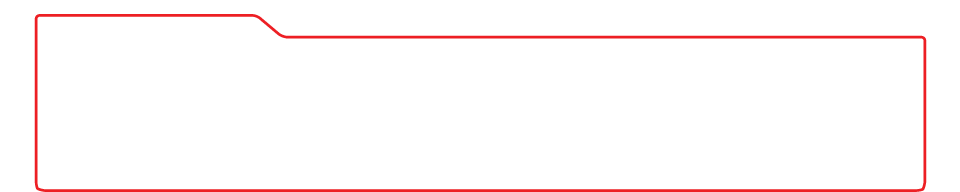
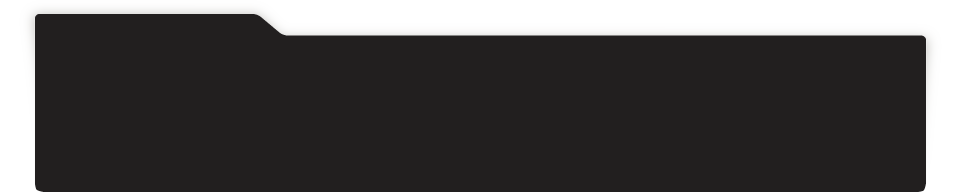
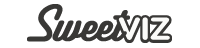
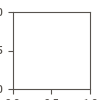
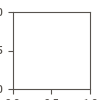

In [ ]:
!pip install sweetviz --quiet
# --- Import thư viện cần thiết ---
import pandas as pd
import sweetviz as sv
# Thay đường dẫn cho phù hợp
file_path = "/content/drive/MyDrive/Data_Analysis/Tuần 5/marketing_campaign.csv"
# Đọc dữ liệu
df = pd.read_csv(file_path)
# Xem vài dòng đầu để kiểm tra dữ liệu
print("Kích thước dữ liệu:", df.shape)
display(df.head())
# --- Tạo báo cáo SweetViz ---
# report = sv.analyze([df, "Marketing Campaign"], target_feat="Response")
report = sv.analyze([df, "Marketing Campaign"])
# --- Xuất báo cáo ra HTML ---
output_path = "/content/drive/MyDrive/DataAnalysis/Tuần 5/marketing_report.html"
report.show_html(output_path)

# Nếu muốn hiển thị trực tiếp trong Colab
report.show_notebook(w=1000, h=700)

#Kết Thúc
